# INTRODUCTION

Customer churn remains a major challenge for telecom companies, leading to revenue loss and weakened customer loyalty. Predicting churn before it happens enables proactive retention and smarter decision-making.

This project introduces a Real-Time Churn Prediction System designed to identify customers at risk of leaving and explain the reasons behind their behavior. By combining data-driven insights with real-time monitoring, the system empowers businesses to act quickly, reduce churn, and improve long-term customer relationships.

## Project Objectives

- Identify Churn Patterns:
Apply advanced data analysis techniques to uncover meaningful patterns and trends within customer behavior, helping to better understand the drivers of churn.


- Predict Customer Churn:
Build and evaluate machine learning models capable of accurately predicting customers at risk of leaving, allowing timely intervention and proactive retention actions.


- Analyze Key Influencing Factors:
Examine the main factors impacting churn — such as service quality, pricing, competition, and customer support — to gain actionable insights into customer decision-making.


- Develop Retention Strategies:
Translate analytical findings into practical strategies aimed at improving customer loyalty through service improvements, competitive offers, and personalized engagement initiatives.

# Dataset Overview

This project leverages data from the Kaggle Telco Customer Churn Dataset, which contains detailed information about a telecommunications company’s customers and their service usage.

The goal is to identify patterns and build predictive models to determine whether a customer is likely to churn.

| **Attribute Name**   | **Description**                                                                                      |
| -------------------- | ---------------------------------------------------------------------------------------------------- |
| **customerID**       | Unique identifier assigned to each customer.                                                         |
| **gender**           | Customer’s gender (Male, Female).                                                                    |
| **SeniorCitizen**    | Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).                                |
| **Partner**          | Whether the customer has a partner (Yes, No).                                                        |
| **Dependents**       | Whether the customer has dependents (Yes, No).                                                       |
| **tenure**           | Number of months the customer has stayed with the company.                                           |
| **PhoneService**     | Indicates if the customer has phone service (Yes, No).                                               |
| **MultipleLines**    | Whether the customer has multiple lines (Yes, No, No phone service).                                 |
| **InternetService**  | Type of internet service (DSL, Fiber optic, No).                                                     |
| **OnlineSecurity**   | Availability of online security service (Yes, No, No internet service).                              |
| **OnlineBackup**     | Availability of online backup service (Yes, No, No internet service).                                |
| **DeviceProtection** | Availability of device protection service (Yes, No, No internet service).                            |
| **TechSupport**      | Availability of technical support service (Yes, No, No internet service).                            |
| **StreamingTV**      | Whether the customer has streaming TV service (Yes, No, No internet service).                        |
| **StreamingMovies**  | Whether the customer has streaming movie service (Yes, No, No internet service).                     |
| **Contract**         | Type of contract (Month-to-month, One year, Two year).                                               |
| **PaperlessBilling** | Whether the customer uses paperless billing (Yes, No).                                               |
| **PaymentMethod**    | Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)). |
| **MonthlyCharges**   | Amount charged to the customer every month.                                                          |
| **TotalCharges**     | Total amount charged to the customer over their tenure.                                              |
| **Churn**            | Indicates whether the customer has churned (Yes, No).                                                |


# Key Questions

This analysis seeks to address the following central questions:

- What drives customer churn the most?
Which underlying factors  such as service quality, pricing, or customer engagement  have the greatest influence on whether customers decide to leave the company?

- How do contract types and customer relationships affect churn?

- Do longer-term contracts or specific payment methods contribute to improved customer retention and reduced churn rates?

- How accurately can churn be predicted, and which features matter most?

- Can we build a reliable predictive model to identify customers at risk of churning, and what are the key predictors driving those outcomes?

# Limitations

- Data Quality and Completeness
The accuracy and reliability of the analysis are strongly dependent on the quality of the dataset. Missing values, data entry errors, or sampling biases could reduce the robustness of insights and model predictions.

- Scope and Coverage of Variables
The dataset may not capture all potential factors influencing customer churn, such as customer sentiment, external market dynamics, or service interaction history. This limitation may restrict the depth and context of the analysis.

- Temporal Constraints
The dataset represents a static snapshot of customer behavior rather than continuous real-time data. As a result, it may not fully reflect changing customer patterns or evolving business conditions.

- Model Generalization
Models trained on this dataset might perform well on similar data but may require adaptation and retraining when applied to different markets or customer segments.

# Importing Libraries

In [ ]:
!pip install joblib>=1.2.0

In [ ]:

!pip install scikit-learn --upgrade -q

In [ ]:
!pip install ydata-profiling

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# Options for cleaner display
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')


In [ ]:
# # Loading data
path= "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)


In [ ]:
# Displaying first lines and general information
print("Data overview :")
display(df.head())


Data overview :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# A Data Preparation (Data Preprocessing)

## Initial Cleaning and Automated Exploratory Analysis

In [ ]:
# Try to convert TotalCharges to numeric, errors will become NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## A. Cleaning and Imputation of Missing Values

In [ ]:
# Display rows with missing TotalCharges to confirm
print("Customers with missing TotalCharges (before imputation):")
print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'TotalCharges']])


Customers with missing TotalCharges (before imputation):
      customerID  tenure  TotalCharges
488   4472-LVYGI       0           NaN
753   3115-CZMZD       0           NaN
936   5709-LVOEQ       0           NaN
1082  4367-NUYAO       0           NaN
1340  1371-DWPAZ       0           NaN
3331  7644-OMVMY       0           NaN
3826  3213-VVOLG       0           NaN
4380  2520-SGTTA       0           NaN
5218  2923-ARZLG       0           NaN
6670  4075-WKNIU       0           NaN
6754  2775-SEFEE       0           NaN


In [ ]:

# Imputation by the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

In [ ]:

# Check that there are no more missing values
print("Number of missing values ​​after imputation:")
print(df.isnull().sum().sum())

Number of missing values ​​after imputation:
0


Imputation of the TotalCharges column using the median is preferred because it is robust and resistant to outliers.

Why the Median? Unlike the mean, the median is the 50th percentile and is not affected by customers with exceptionally high total charges.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# B. Analysis of Target Variable: `Churn`

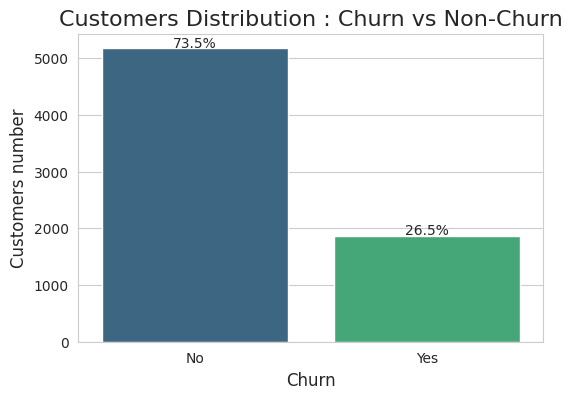

In [ ]:
# Visualization of Churn Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
plt.title('Customers Distribution : Churn vs Non-Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Customers number', fontsize=12)

# Added percentages to the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y + 20), ha='center')

plt.show()

The chart illustrates the distribution of customers between those who remained (Non-Churn) and those who unsubscribed (Churn), highlighting a marked class imbalance in the dataset.

Key Observation: 73.5% of customers did not churn (majority class), compared to only 26.5% who unsubscribed (minority class).

Implication for the Model: This imbalance of approximately 3:1 means that training a churn prediction model is an imbalanced classification problem.

Strategy: To ensure the model is effective in retention efforts, it is essential to focus on improving the Recall of the minority class. Techniques such as adjusting the decision threshold or applying class weights

# Descriptive statistics

In [ ]:
print("\nDescriptive statistics of numerical variables :")
display(df.describe())


Descriptive statistics of numerical variables :


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:

profile = ProfileReport(df, title="Profiling Report",explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 16.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df=df.drop('customerID', axis=1)

#Bivariate Analysis: Exploring the Link Between Each Variable and Churn

In [ ]:
# Selection of 'object' or 'category' type columns
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative variables:", qualitative_vars)

Qualitative variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


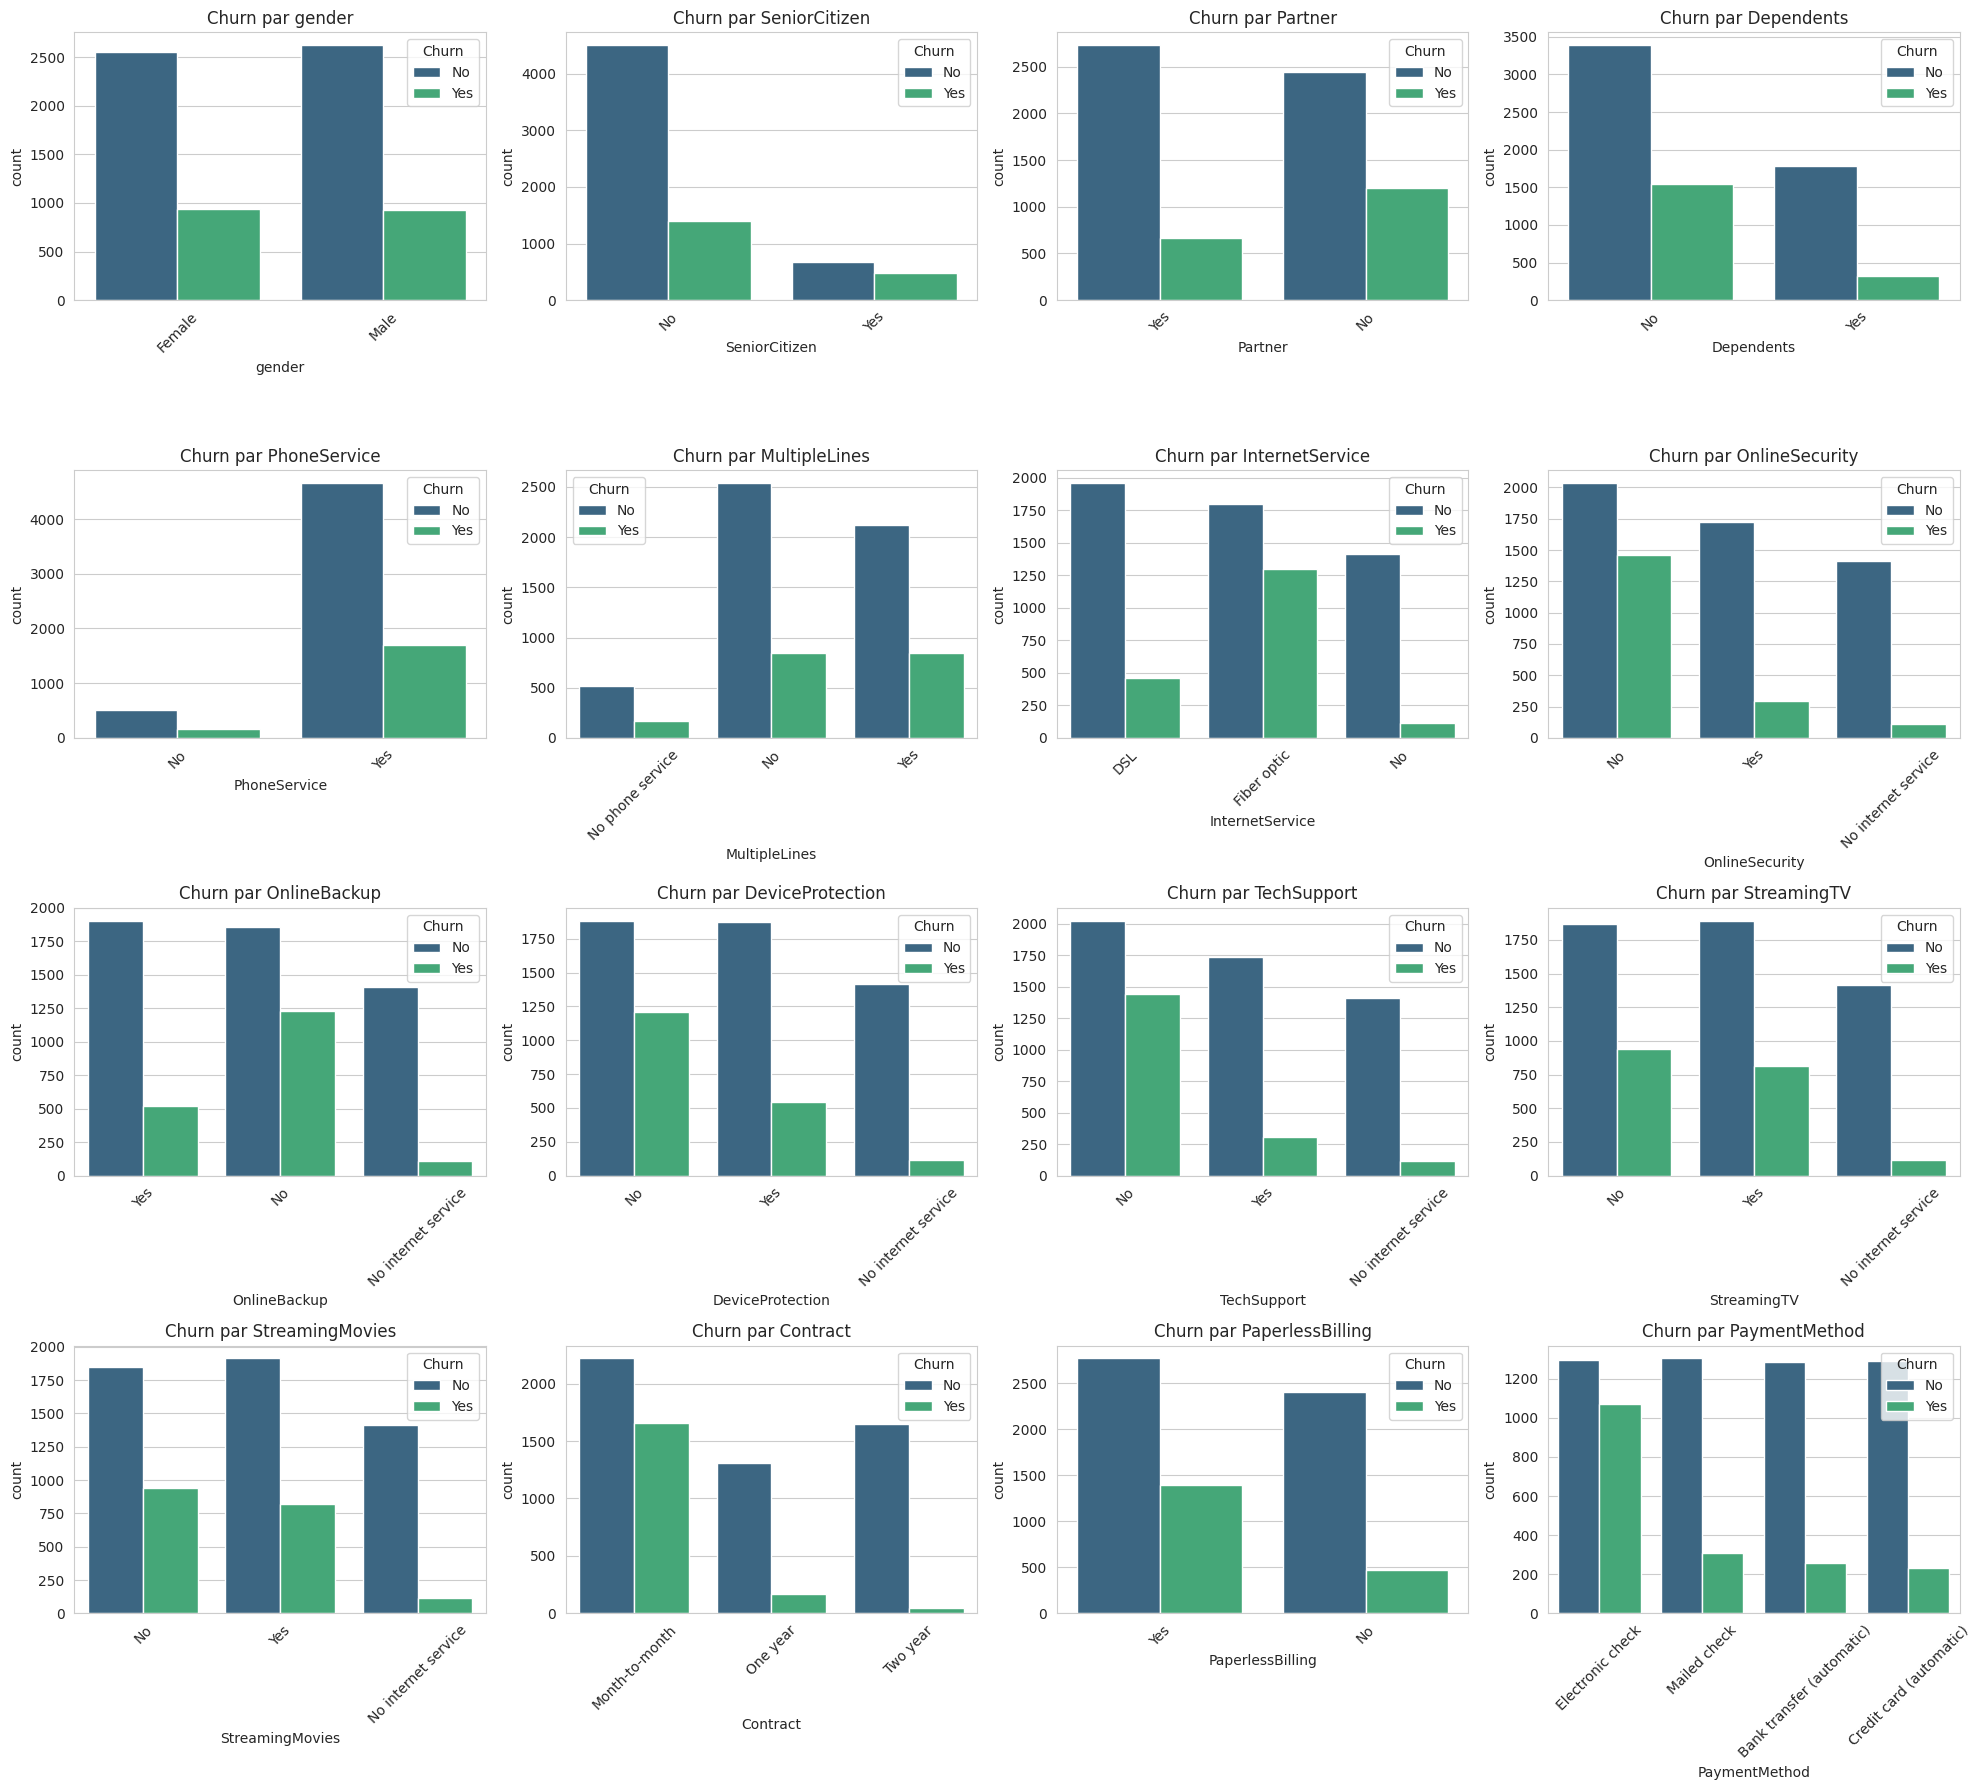

In [ ]:
categorical_features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                      'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Churn par {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


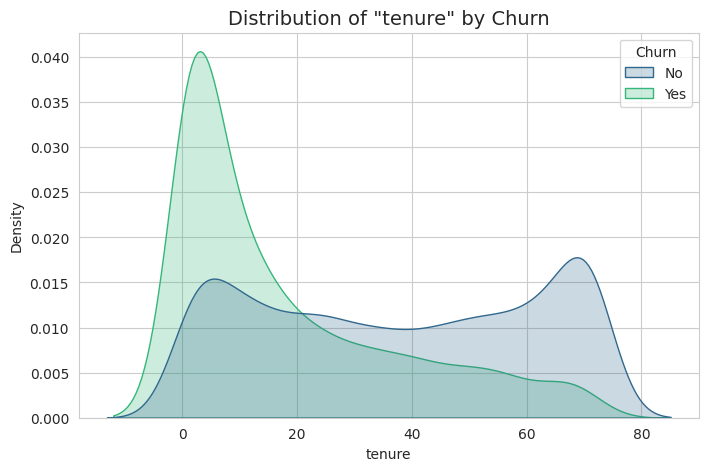

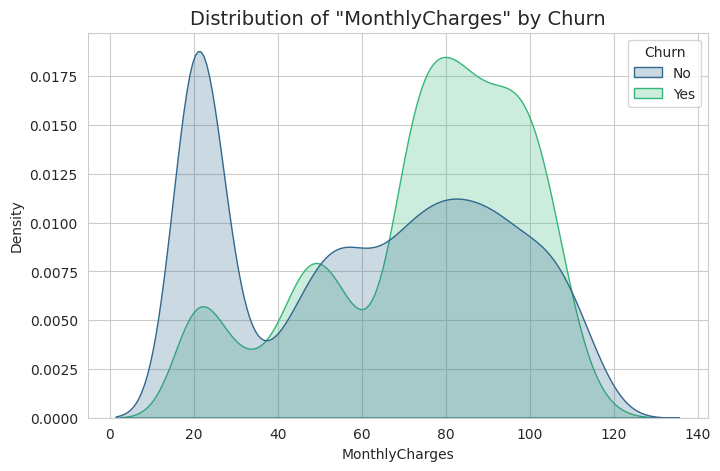

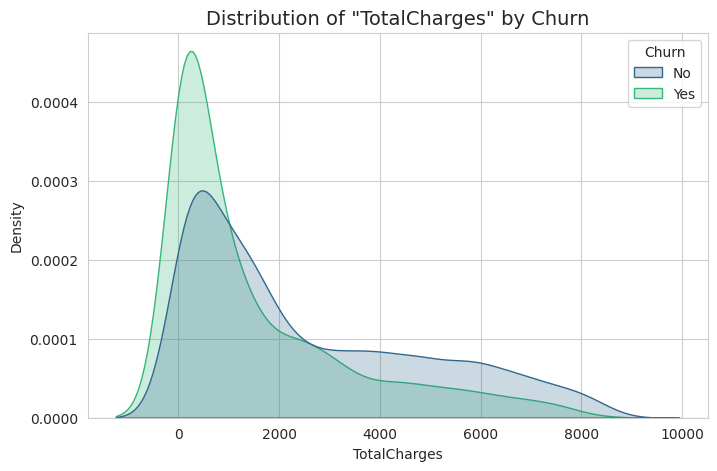

In [ ]:
#Let's analyze how the distribution of numerical variables changes depending on churn.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of "{col}" by Churn', fontsize=14)
    plt.show()

## Hypotheses to be validated with these graphs:
At-Risk Customer Profile (Churner Type):
- Contract: The customer has a monthly contract with no long-term commitment.
- Tenure: They are a recent customer, likely with less than one year of tenure.
- Billing: They pay high monthly fees (probably for fiber service) and use an inconvenient payment method such as electronic check.
- Services: They have not subscribed to "comfort" and security services like OnlineSecurity, OnlineBackup, DeviceProtection, or TechSupport. As a result, they are less integrated into the company's ecosystem.
- Internet: They use fiber optic internet, which ;despite its performance appears to be associated with higher churn risk.

- Protection Services: Customers without OnlineSecurity or TechSupport seem to leave more.

- Monthly Charges: There is a spike in churn for customers with high monthly charges.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df_clean=df

# Correlation Matrix for Numerical Variables

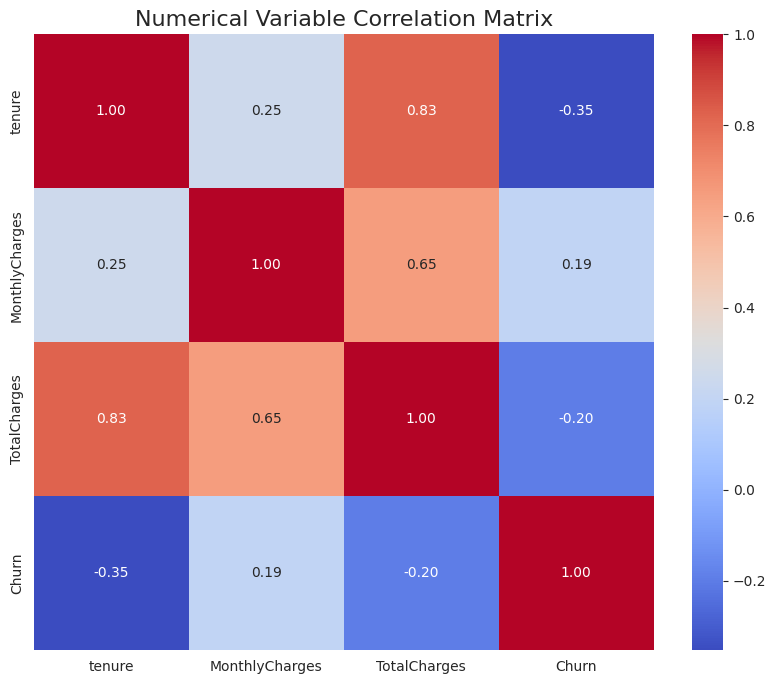

In [ ]:
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
numerical_df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10, 8))
sns.heatmap(
numerical_df.corr(),
annot=True, # Display correlation values
cmap='coolwarm', # Choose a color palette
fmt=".2f" # Format numbers to 2 decimal places
)
plt.title('Numerical Variable Correlation Matrix', fontsize=16)
plt.show()

# Observations and Insights:
Tenure and Total Charges (0.83): Strong positive correlation. This makes perfect sense: the longer a customer stays, the higher the total amount they paid. This confirms the consistency of our data.

Monthly Charges and Total Charges (0.65): Moderate positive correlation. Also logical.

Tenure and Churn (-0.35): Negative correlation. This is exactly what we saw in the EDA: as tenure increases, the probability of churn decreases.

Monthly Charges and Churn (0.19): Weak positive correlation. The higher the monthly charges, the higher the probability of churn.

# Multivariate Analysis - The Fiber Optic "Paradox"

Our EDA showed that customers with fiber optics churn more. But is this because of the fiber itself, or because fiber is associated with higher monthly fees? We can visualize three variables at once to answer this question.

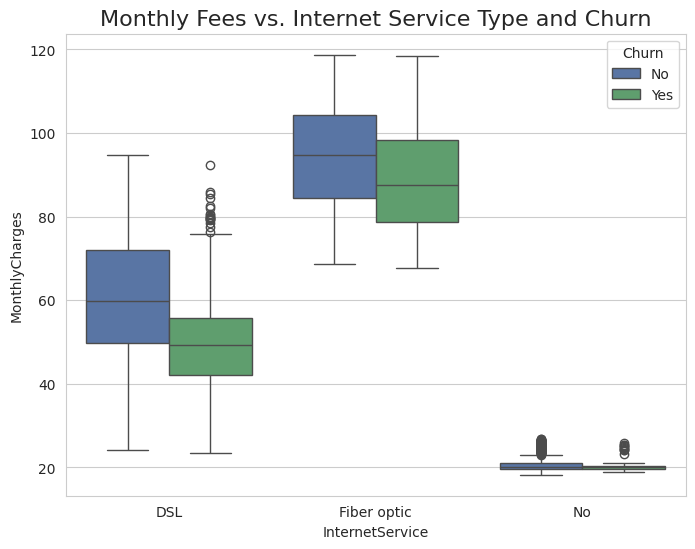

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='InternetService',
    y='MonthlyCharges',
    hue='Churn'
)
plt.title('Monthly Fees vs. Internet Service Type and Churn', fontsize=16)
plt.show()

## Analyzing this complex graph:

DSL & No Internet: Monthly fees are low, and the price difference between those who leave ("Yes") and those who stay ("No") is minimal. Churn is low in these categories.

Fiber optic: This is where the story begins.
Monthly fees for fiber optic are generally much higher.

BUT MORE IMPORTANTLY: Among fiber optic customers, the median monthly fee for those who leave is significantly higher than that of those who stay.

##Conclusion / Refined Hypothesis:
 It's not so much fiber optics by itself that causes churn, but rather the high price associated with it. Fiber optic customers who pay the most expensive bills are the most likely to leave. This is a crucial nuance for the company: the problem may not be technical, but commercial (pricing).

In [ ]:
print(df['tenure'].head())

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64


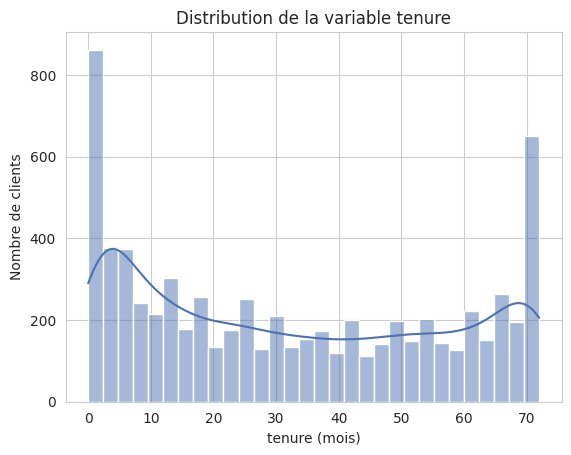

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution de la variable tenure')
plt.xlabel('tenure (mois)')
plt.ylabel('Nombre de clients')
plt.show()

In [ ]:
print(df['tenure'].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


In [ ]:
print(df['tenure'].isna().sum())

0


# Advanced Feature Engineering

Based on EDA, we know that tenure is a key factor. Grouping customers by tenure could help the model better capture critical thresholds.

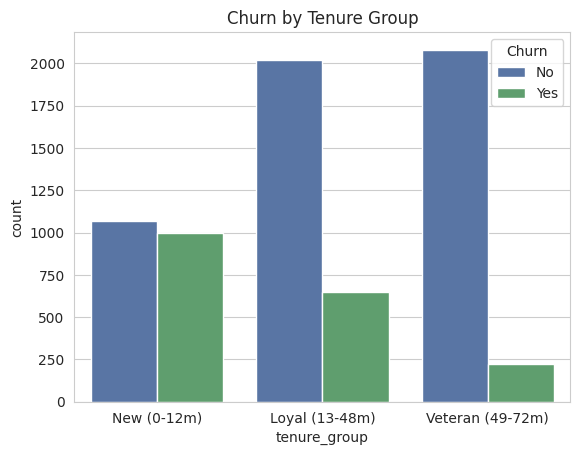

In [ ]:
# Creating Tenure Groups

labels = ["New (0-12m)", "Loyal (13-48m)", "Veteran (49-72m)"]
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 48, 73], labels=labels, right=False) # right=False to include 0


sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()

Observation: New customers have a much higher churn rate.  new tenure_group variable captures this information well.

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New (0-12m)
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Loyal (13-48m)
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New (0-12m)


## Cost/tenure ratio: monthly average—may reveal customers who have recently been billed very high (churn risk)

In [ ]:
df['MeanCharges'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))


In [ ]:
print(df['MeanCharges'].describe())

count    7043.000000
mean       66.880842
std        60.660378
min        13.775000
25%        36.255000
50%        70.450000
75%        90.285826
max      1397.475000
Name: MeanCharges, dtype: float64


# Analysis and preparation of categorical variables

## Statistical Test for the Significance of Variables

In [ ]:
# Select categorical columns (object or category type), excluding 'customerID'
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.drop('customerID', errors='ignore')

# Display columns and their unique categories
for col in cat_cols:
     uniques = sorted(df_clean[col].dropna().unique())
     print(f" {col} - ({len(uniques)} categories) : {uniques}")

 gender - (2 categories) : ['Female', 'Male']
 SeniorCitizen - (2 categories) : ['No', 'Yes']
 Partner - (2 categories) : ['No', 'Yes']
 Dependents - (2 categories) : ['No', 'Yes']
 PhoneService - (2 categories) : ['No', 'Yes']
 MultipleLines - (3 categories) : ['No', 'No phone service', 'Yes']
 InternetService - (3 categories) : ['DSL', 'Fiber optic', 'No']
 OnlineSecurity - (3 categories) : ['No', 'No internet service', 'Yes']
 OnlineBackup - (3 categories) : ['No', 'No internet service', 'Yes']
 DeviceProtection - (3 categories) : ['No', 'No internet service', 'Yes']
 TechSupport - (3 categories) : ['No', 'No internet service', 'Yes']
 StreamingTV - (3 categories) : ['No', 'No internet service', 'Yes']
 StreamingMovies - (3 categories) : ['No', 'No internet service', 'Yes']
 Contract - (3 categories) : ['Month-to-month', 'One year', 'Two year']
 PaperlessBilling - (2 categories) : ['No', 'Yes']
 PaymentMethod - (4 categories) : ['Bank transfer (automatic)', 'Credit card (automatic)'

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

In [ ]:
# Selection of 'object' or 'category' type columns
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative variables:", qualitative_vars)

Qualitative variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']


In [ ]:
# Categorical Variables (including object/category and int64 binaries)
# 'Churn' is the target variable
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

In [ ]:
# Numerical Variables
numerical_features = [
    'tenure', 'MonthlyCharges', 'TotalCharges','MeanCharges'
]


In [ ]:
# --- 2. Chi-Square Test (Categorical Variables) ---
print("=" * 70)
print("Significance Analysis (Chi-Square) for Categorical/Binary Variables")
print("=" * 70)

for col in categorical_features:

     temp_df = df.dropna(subset=[col, 'Churn'])

     # Create the contingency table
     contingency_table = pd.crosstab(temp_df[col], temp_df['Churn'])

     # Apply the Chi-Square test

     chi2, p_value, dof, expected = chi2_contingency(contingency_table, correction=True)

     # Interpretation
     significance = "SIGNIFICANT (p < 0.05) **" if p_value < 0.05 else "Not Significant"
     print(f"Variable '{col}': p-value = {p_value:.6f} -> {significance}")

Significance Analysis (Chi-Square) for Categorical/Binary Variables
Variable 'gender': p-value = 0.486579 -> Not Significant
Variable 'SeniorCitizen': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'Partner': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'Dependents': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'PhoneService': p-value = 0.338783 -> Not Significant
Variable 'MultipleLines': p-value = 0.003464 -> SIGNIFICANT (p < 0.05) **
Variable 'InternetService': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'OnlineSecurity': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'OnlineBackup': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'DeviceProtection': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'TechSupport': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'StreamingTV': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Variable 'StreamingMovies': p-value = 0.000000 -> SIGNIFICANT (p < 0.05) **
Vari

We are considering removing the gender and phoneservie variables as they provide no statistical information.

In [ ]:
# --- 3. Student's t-Test (Numeric Variables) ---
print("\n" + "=" * 70)
print("Significance Analysis (t-Test) for Numeric Variables")
print("=" * 70)


churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']


for col in numerical_features:
   # Apply Student's t-test (nan_policy='omit' handles missing values)
    stat, p_value = ttest_ind(churn_yes[col], churn_no[col], nan_policy='omit')

    # Interpretation
    significance = "SIGNIFICATIF (p < 0.05) **" if p_value < 0.05 else "Non Significatif"

    # Displaying results
    print(f"Variable '{col}': p-value = {p_value:.6f} -> {significance}")

    # Show the averages to understand the meaning of the relationship
    mean_yes = churn_yes[col].mean()
    mean_no = churn_no[col].mean()
    print(f"    average Churn=Yes: {mean_yes:.2f} | average Churn=No: {mean_no:.2f}")

print("=" * 70)


Significance Analysis (t-Test) for Numeric Variables
Variable 'tenure': p-value = 0.000000 -> SIGNIFICATIF (p < 0.05) **
    average Churn=Yes: 17.98 | average Churn=No: 37.57
Variable 'MonthlyCharges': p-value = 0.000000 -> SIGNIFICATIF (p < 0.05) **
    average Churn=Yes: 74.44 | average Churn=No: 61.27
Variable 'TotalCharges': p-value = 0.000000 -> SIGNIFICATIF (p < 0.05) **
    average Churn=Yes: 1531.80 | average Churn=No: 2552.88
Variable 'MeanCharges': p-value = 0.000000 -> SIGNIFICATIF (p < 0.05) **
    average Churn=Yes: 74.43 | average Churn=No: 64.15


The significant deviation in averages confirms that high-risk customers are those who pay a lot for low seniority, which validates our Feature Engineering approach (Monthly Overcharge Ratio)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MeanCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New (0-12m),29.850000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Loyal (13-48m),55.573529
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New (0-12m),54.075000
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Loyal (13-48m),40.905556
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New (0-12m),75.825000
